P1 -> mean = 8.10168, std = 0.04674
P4 -> mean = 2.36755, std = 0.11275
P8 -> mean = 1.33055, std = 0.02461
P16 -> mean = 0.68494, std = 0.03209
P32 -> mean = 0.55038, std = 0.02398
P64 -> mean = 0.69206, std = 0.12478
SEQ -> mean = 8.38270, std = 0.12208


/home/gkoffas/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:64: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


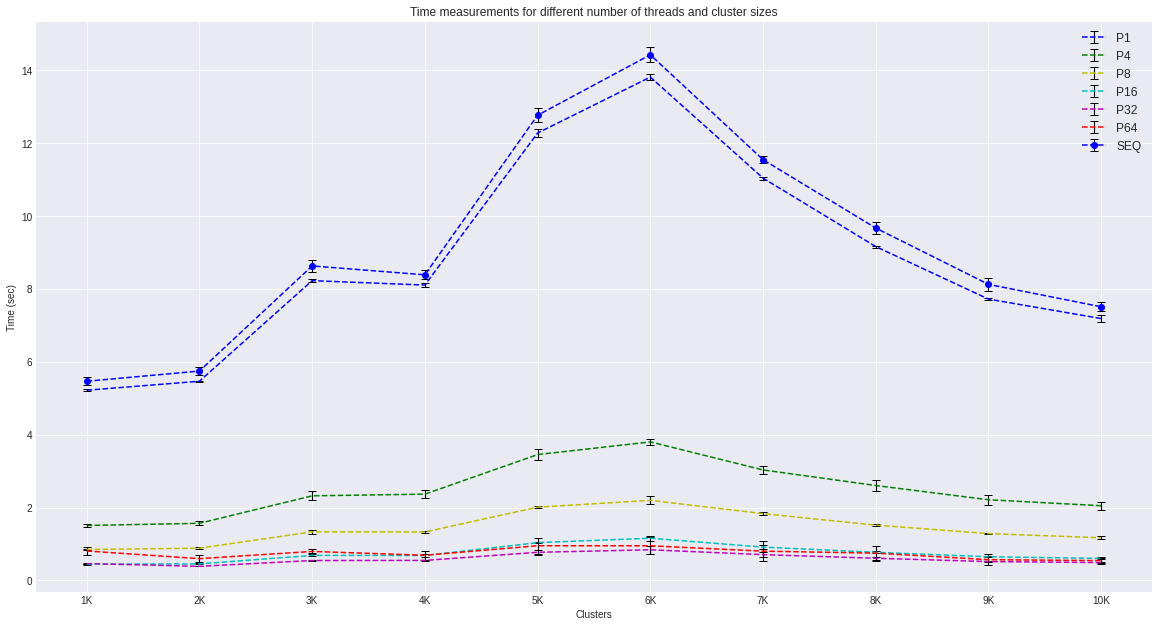

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

%matplotlib inline

FILE_SEPARATOR = "--------------------\n"
DIR_PATH = os.getcwd()

files = [filename for filename in os.listdir(DIR_PATH) if filename.startswith('log')]

files = sorted(files)

TIMES_LIST=[]
temp_list = []
MEASUREMENT_DICT ={}

MEASUREMENT_KEYS=['P1', 'P4', 'P8', 'P16', 'P32', 'P64', 'SEQ']
FORMAT_STYLES=['b--', 'g--', 'y--', 'c--', 'm--', 'r--', 'bo--']
DF_COLS = ['1K', '2K', '3K', '4K', '5K', '6K', '7K', '8K', '9K', '10K']

# Each measurement amps the clusters by 1k.
i = 0
for file_element in files:
    with open(file_element, 'r') as read_stream:
        
        # Get configuration of measurements
        
        first_time=1
        for line in read_stream:
            if (line == FILE_SEPARATOR):
                TIMES_LIST.append(temp_list)
                temp_list = []
                continue
            else:
                temp_list.append(float(line))
                    
    MEASUREMENT_DICT['{}'.format(MEASUREMENT_KEYS[i])] = TIMES_LIST
    TIMES_LIST = []
    i+= 1

mean_list = []
std_list = []
    
fig = plt.figure(figsize=(20, 10.5))
plt.style.use('seaborn-darkgrid')
i = 0
for key in MEASUREMENT_DICT:
    temp_np_array = np.array(MEASUREMENT_DICT[key]).T
    temp_df = pd.DataFrame(data=temp_np_array, columns=DF_COLS)
    for col in temp_df.columns:
        tempS = temp_df[col]
        mean_list.append(tempS.describe(include='all')['mean'])
        std_list.append(tempS.describe(include='all')['std'])
    print("{} -> mean = {:.5f}, std = {:.5f}".format(MEASUREMENT_KEYS[i], mean_list[3], std_list[3]))
    metrics_df = pd.DataFrame( {'mean': mean_list, 'std': std_list} )
    plt.errorbar(metrics_df.index, metrics_df['mean'].values, fmt=FORMAT_STYLES[i], \
                 yerr=metrics_df['std'].values, ecolor='k', elinewidth=1.1, capsize=4)
    mean_list = []
    std_list = []
    i+=1

plt.xticks(range(len(metrics_df.index)))
plt.axes().set_xticklabels(temp_df.columns)
plt.title("Time measurements for different number of threads and cluster sizes")
plt.xlabel("Clusters")
plt.ylabel("Time (sec)")
plt.legend(labels=MEASUREMENT_KEYS, loc='upper right', prop={'size': 12})
plt.show()